In [829]:
import numpy as np, matplotlib.pyplot as plt

<font size = "15">Question 1: Single Perceptron<font size= "15">

In [830]:
#we will seed the np random calls we use, this is to provide reproducibility in the outputs seen
#we will use a different seed for each question

np.random.seed(233)
#seed 233, very large difference from the initial line, this helps to show the variance in iteration count with level of separability



params = np.random.randn(3) #w1x1 + w2x2 + b
a2b2 = np.sqrt(params[0] ** 2 + params[1] ** 2)


In [831]:
# method used to generate the dataset with a specific gamma is to continuously generate points until we get points that satisfy the gamma conditions from a line I randomly generated
# this will ensure that every point in the dataset is at least gamma distance away from the line that we generated in the previous cell

counter = 0
X = np.empty((0,3))

gamma = 0.75

while counter < 1000:
    tup = np.random.uniform(-15, 15, (1,3))
    tup[:, 2] = 1 #IMP: this is so that the parameters for the classifier are all encoded in the w vector, this parameter replaces the addition of bias 'b' to the neuron
                  #a similar technique is used in the subsequent 2 questions as well, with the bias term being absorbed into the parameters and the input feature map having an extra constant

    if np.abs(np.matmul(tup, params.T) / a2b2) > gamma :
        X = np.vstack([X, tup])
        counter+=1 #every time a point is generated that meets our criteria, we add it to the dataset and increase the current size

Y = np.ones(1000)

t = 0

for i in range(1000):
    if(np.matmul(X[i], params.T) < 0):
        Y[i] *= -1 #if the point lies on the negative side of the line, then we classify it as the negative class 
        t+=1

print(t) #number of points that were classified as the negative class, this number can vary a lot based on your initial choice of line and the numpy random function used

531


In [832]:
w = np.zeros(X.shape[1]) #initialization
print(w.shape)

def perceptron_train(w, X, Y, num_epochs):
    num_changes = 0
    for e in range(num_epochs):
        epoch_changes = 0
        for i in range(X.shape[0]):
            if X[i].dot(w) * Y[i] <= 0:
                w = w + X[i] * Y[i] # perceptron algorithm update step
                num_changes +=1
                epoch_changes +=1
        if(epoch_changes == 0): #if there were no changes in the current epoch, then there will never be changes since the information in the training set is then encoded in the parameters already
            print("Training stopped early at epoch " + str(e+1) + " due to convergence")
            break
    print("Number of changes is : " + str(num_changes))
    return w

(3,)


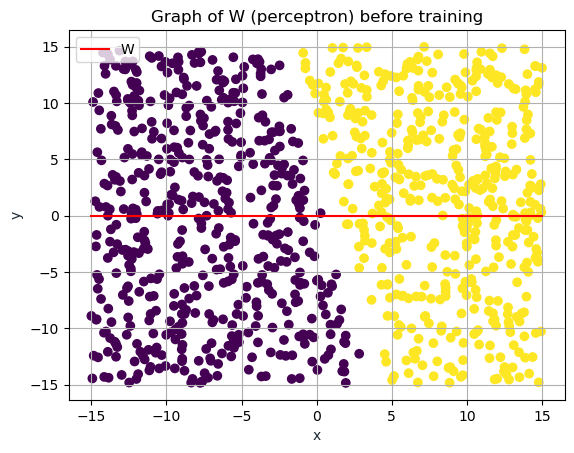

In [833]:
x = np.linspace(-15,15,100)
y = -(np.zeros(100))
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W (perceptron) before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(X[:,0], X[:,1], c = Y)
plt.grid()
plt.show()  

In [834]:
print("W before training: " + str(w))
w = perceptron_train(w, X, Y, 100)
print("W after training: " + str(w))

W before training: [0. 0. 0.]
Training stopped early at epoch 16 due to convergence
Number of changes is : 82
W after training: [ 71.13752226  12.88509387 -44.        ]


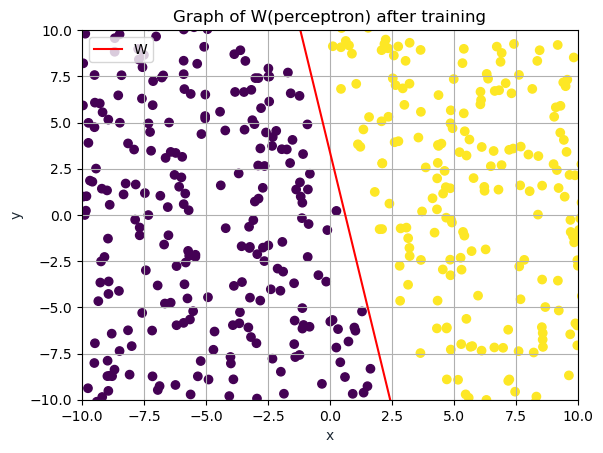

In [835]:
x = np.linspace(-10,10,100)
y = -(w[0].item()/w[1].item())*x - (w[2].item()/w[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W(perceptron) after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.legend(loc='upper left')
plt.scatter(X[:,0], X[:,1], c = Y)
plt.grid()
plt.show()

Linear Separability of the Dataset(gamma) vs Number of Iterations Until Convergence(K)
| gamma | K   |   
|-------|-----|
| 0.25  | 137 |
| 0.5   | 60  |
| 0.75   |  82   |
|1|1|
|2.5|1|

<font size = "15">Question 2: Linear Classifier Trained Using Gradient Descent<font size= "15">

In [836]:
np.random.seed(233) #6 and 88 are good seeds for almost half separable data

alpha = 1.5 #this is the learning rate for gradient descent

params = np.random.randn(3) #w1x1 + w2x2 + b, similar to before

a2b2 = np.sqrt(params[0] ** 2 + params[1] ** 2)
print(params.shape)
print(a2b2)

(3,)
0.9002363559468222


In [837]:
counter = 0
X = np.empty((0,3))

gamma = 0.05 #keeping a small degree of separability for the linear classifier, so that convergence is not "too easy"

while counter < 1000:
    tup = np.random.uniform(-10, 10, (1,3))
    tup[:, 2] = 1 
    if np.abs(np.matmul(tup, params.T) / a2b2) > gamma :
        X = np.vstack([X, tup])
        counter+=1

Y = np.ones(1000)

t = 0

for i in range(1000):
    if(np.matmul(X[i], params.T) < 0):
        Y[i] *= 0
        t+=1

print(t)

554


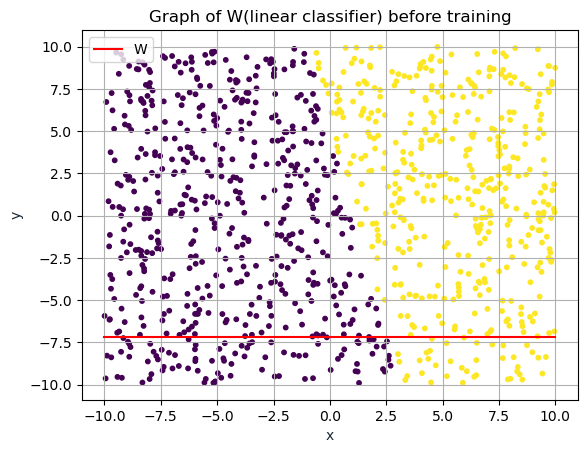

In [838]:
w = np.zeros(X.shape[1])
w[1] = 0.23
w[2] = 1.65


x = np.linspace(-10,10,100)
y = -(w[0].item()/w[1].item())*x - (w[2].item()/w[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W(linear classifier) before training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.legend(loc='upper left')
plt.scatter(X[:,0], X[:,1], s= 10, c = Y)
plt.grid()
plt.show()

In [839]:

#here let's implement the gradient functions
# the classifier is linear with sigmoid function, therefore 0 and 1 outputs
#the loss we will use is log loss, with the function being -1/m * sigma ( y(logf(x)) + (1-y)log(1-f(x)))

def sigmoid(x):
    return 1 /( 1 + np.exp(-x))

def loss_term_1(X, Y, w):
    #this is the gradient term for w1

    #now we compute the output of the current parameters on the training set
    forward = sigmoid( np.dot(w, X.T)) # 1x3 * 3xm -> 1xm

    term_1_gradient = np.sum(-1/X.shape[0] * Y  * (1 - forward.T) * X[:, 0] + 1 / X.shape[0] * (1-Y) * forward.T * X[:, 0])
    return term_1_gradient

def loss_term_2(X, Y, w): #similar to the previous function, the only thing that changes is which element of the training set we multiply in the gradient, as per the derivative with respect to their respective parameters
    forward = sigmoid(np.dot(w, X.T))

    term_2_gradient = np.sum(-1/X.shape[0] * Y  * (1 - forward.T) * X[:, 1] + 1 / X.shape[0] * (1-Y) * forward.T * X[:, 1])
    return term_2_gradient

def loss_term_3(X, Y, w): #similar to previous 2 functions
    forward = sigmoid(np.dot(w, X.T))

    term_3_gradient = np.sum(-1/X.shape[0] * Y  * (1 - forward.T) * X[:, 2] + 1 / X.shape[0] * (1-Y) * forward.T * X[:, 2])
    return term_3_gradient

def gradient(X, Y, w): #function to collate the previous 3 functions
    
    ret = np.zeros(3) #creating a numpy array formatted like our parameters vector so that the gradient vector can be subtracted for all three parameters at once

    ret[0] = loss_term_1(X, Y, w)
    ret[1] = loss_term_2(X, Y, w)
    ret[2] = loss_term_3(X, Y, w)

    if(ret.shape != w.shape):
        print("The shape of the gradient and the parameters do not match, check the code") #sanity check
    
    return ret


In [840]:
num_epochs = 100

for i in range(num_epochs):
    grad = gradient(X, Y, w)
    #print("Gradient is now " + str(grad))
    w = w - alpha * grad
    #print("Value of w is now" + str(w))


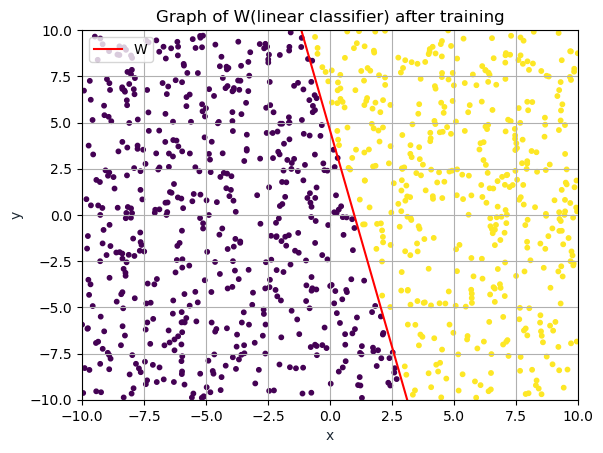

In [841]:
x = np.linspace(-10,10,100)
y = -(w[0].item()/w[1].item())*x - (w[2].item()/w[1].item())
plt.plot(x, y, '-r', label='W')
plt.title('Graph of W(linear classifier) after training')
plt.xlabel('x', color='#1C2833')
plt.ylabel('y', color='#1C2833')
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.legend(loc='upper left')
plt.scatter(X[:,0], X[:,1], s=10, c = Y)
plt.grid()
plt.show()

<font size = "15">Question 3: Multi Layer Perceptron<font size= "15">

In [842]:
#here we are defining the MLP functions, that will operate on the weights and inputs as parameters. 

#layer_size unit hidden layer

# X - 3 x m
# Y - 1 x m
# W1 - layer_size x 3
# W2 - 1 x layer_size

def forward(X, W1, W2):
    Z1 = W1 @ X
    A1 = sigmoid(Z1) # -> 5 x m
    Z2 = W2 @ A1 # -> 1x5 @ 5 x m  =  1xm
    A2 = sigmoid(Z2) # -> 1xm

    ret = {}
    ret["A1"] = A1
    ret["A2"] = A2
    return ret

def loss(Y_pred, Y):

    return -1 * np.mean(Y * np.log(Y_pred) + (1-Y) * (1 - np.log(Y_pred)) )

def backprop(X, Y, W1, W2):
    
    fw = forward(X, W1, W2)
    
    
    dZ2 = 1/X.shape[1]*(fw["A2"] - Y) # -> 1 x m
   
    dW2 = dZ2 @ fw["A1"].T # -> same shape as W2

    dZ1 = np.multiply(W2.T @ dZ2 , (fw["A1"] * (1 - fw["A1"]))) # -> 5 x m

    dW1 = dZ1 @ X.T # -> same shape as W1


    #returning the values of dW1 and dW2 as a dictionary, with the keys being variable names
    ret = {}

    ret["dW1"] = dW1
    ret["dW2"] = dW2

    return ret

def fit(X, Y, W1, W2, alpha, num_epochs):

    for i in range(num_epochs):
        params = backprop(X, Y, W1, W2)
        
        if (i+1)%25 == 0:
            print("Score at epoch " + str(i) + ' is ' + str(score(predict(X, W1, W2), Y)))
            
        
        
        W1 = W1 - alpha * params["dW1"]
        W2 = W2 - alpha * params["dW2"]

    return W1, W2

def predict(X, W1, W2):

    fw = forward(X, W1, W2)

    return np.rint(fw["A2"]) #test this function out once - SEEMS OKAY

def score(Y_pred, Y):
    #assuming Ypred is a binary vector
    scor = 0

    for i in range(Y.shape[1]):
        if(Y_pred[0, i] == Y[0, i]):
            scor +=1

    return scor    

In [843]:
np.random.seed(35)

layer_size = 4 #the higher this number goes, the faster we achieve 100% accuracy on the training set
W1 = np.random.randn(layer_size,3)
W2 = np.random.randn(1,layer_size)



(3, 1000)
(1, 1000)


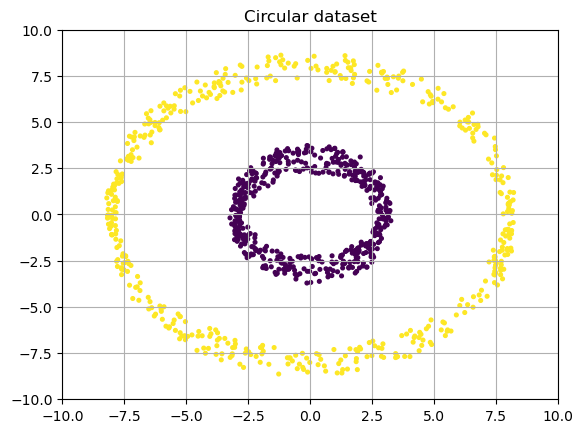

In [844]:
#dataset generation code 

#radii of the 2 circles on whose circumference points are being generated
r1 = 3 
r2 = 8

X = np.ones((1000, 3))

#we will make 500 points of each class 

# first we generate a random angle, then generate a point in space using the cosine and sine of that angle
# then we add noise sampled from a uniform distribution with the given limits
# the range for the points generated near the larger circle
sampl = np.random.uniform(low = 0, high = 360, size = 500)
X[:500, 0] = r1 * np.cos(sampl) + np.random.uniform(low = -0.25, high = 0.25, size = 500)
X[:500, 1] = r1 * np.sin(sampl) + np.random.uniform(low = -0.75, high = 0.75, size = 500)


sampl = np.random.uniform(low = 0, high = 360, size = 500)
X[500:, 0] = r2 * np.cos(sampl) + np.random.uniform(low = -0.25, high = 0.25, size = 500)
X[500:, 1] = r2 * np.sin(sampl) + np.random.uniform(low = -0.75, high = 0.75, size = 500)




Y =np.ones((1000,1))
Y[:500] = 0

#function to shuffle the data generated in the previous lines of code
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

X, Y = unison_shuffled_copies(X, Y)
X = X.T
Y = Y.T
print(X.shape)
print(Y.shape)





plt.figure()
plt.title("Circular dataset")
plt.xlim(-(r2+2), (r2+2))
plt.ylim(-(r2+2), (r2+2))
plt.scatter(X.T[:,0], X.T[:,1], s=7, c = Y.T)
plt.grid()
plt.show()

In [845]:
#print(predict(X, W1, W2))

#print(score(predict(X, W1, W2), Y))
#print(loss(forward(X, W1, W2)["A2"], Y))

W1, W2 = fit(X, Y, W1, W2, 0.5, 275)


Score at epoch 24 is 472
Score at epoch 49 is 362
Score at epoch 74 is 483
Score at epoch 99 is 557
Score at epoch 124 is 649
Score at epoch 149 is 708
Score at epoch 174 is 743
Score at epoch 199 is 783
Score at epoch 224 is 811
Score at epoch 249 is 861
Score at epoch 274 is 957


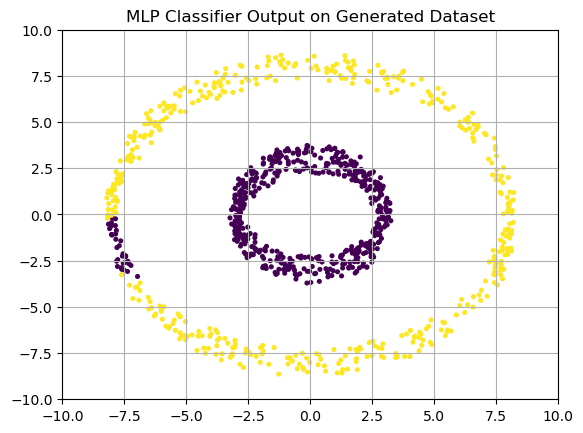

In [846]:

ypred = predict(X, W1, W2)

plt.figure()
plt.title("MLP Classifier Output on Generated Dataset")
plt.xlim(-(r2+2), (r2+2))
plt.ylim(-(r2+2), (r2+2))
plt.scatter(X.T[:,0], X.T[:,1], s=7, c = ypred.T)
plt.grid()
plt.show()